# 2 Machine Learning - Dimensions

In this notebook, I'll try to test default LogisticRegression and LinearRegression estimators with different <i>k</i> (dimensions) values in both SVD and LDA.

In [1]:
from utils import load_user_like_matrix, plot_roc_curve, test_linreg_targets, test_logreg_target
from scipy import sparse, io
from scipy.stats import pearsonr
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, r2_score, mean_squared_error, make_scorer
from sklearn.linear_model import LogisticRegression, LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
users = pd.read_csv('data/users_trimmed.csv', index_col='userid')

In [3]:
df = load_user_like_matrix()

## SVD <i>k</i> = 300

In [4]:
svd_300 = TruncatedSVD(n_components=300, random_state=42)

In [5]:
svd_300.fit(df)

TruncatedSVD(n_components=300, random_state=42)

In [6]:
svd_300.explained_variance_ratio_

array([0.06842395, 0.0321085 , 0.0106316 , 0.00899892, 0.00708867,
       0.00650366, 0.0055078 , 0.00478283, 0.00457361, 0.00399357,
       0.00384924, 0.00369514, 0.00342713, 0.00283043, 0.00274756,
       0.00267699, 0.00255371, 0.00245333, 0.00221807, 0.0021159 ,
       0.00208195, 0.00197909, 0.00190902, 0.00176761, 0.00169834,
       0.00168407, 0.00165998, 0.00161351, 0.00156506, 0.00149816,
       0.00146121, 0.00139826, 0.00138487, 0.00134871, 0.00130666,
       0.0012975 , 0.00125564, 0.00123414, 0.00120733, 0.00119382,
       0.00118216, 0.00117191, 0.00111708, 0.00111401, 0.00108717,
       0.00105823, 0.00103248, 0.0010068 , 0.0009987 , 0.00099124,
       0.00097748, 0.00096123, 0.00093682, 0.00093016, 0.00092734,
       0.00091836, 0.0009095 , 0.0009023 , 0.00089851, 0.00088894,
       0.0008844 , 0.00086612, 0.00085695, 0.00084945, 0.00084042,
       0.00083564, 0.0008243 , 0.00082004, 0.00081064, 0.00080625,
       0.00080318, 0.00079773, 0.00079525, 0.00078524, 0.00077

In [7]:
svd_300.explained_variance_ratio_.sum()

0.36124916731218903

In [8]:
X_svd_300 = svd_300.transform(df)

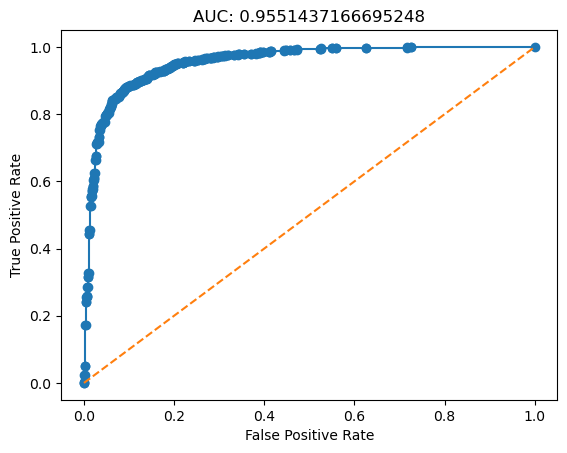

In [9]:
svd_300_gender = test_logreg_target(X_svd_300, users['gender'], 'svd_300_gender')

In [10]:
svd_300_results = test_linreg_targets(X_svd_300, users, 'svd_300_results')

In [11]:
svd_300_results = pd.concat([svd_300_results, svd_300_gender['gender']], axis=1)

In [12]:
svd_300_results

,name,age,ope,con,ext,agr,neu,gender
0,svd_300_results,0.64,0.45,0.27,0.33,0.27,0.31,0.96


### SVD <i>k</i> = 1000

In [13]:
svd_1000 = TruncatedSVD(n_components=1000, random_state=42)

In [14]:
svd_1000.fit(df)

TruncatedSVD(n_components=1000, random_state=42)

In [15]:
svd_1000.explained_variance_ratio_.sum()

0.5744927351285443

In [16]:
X_svd_1000 = svd_1000.transform(df)

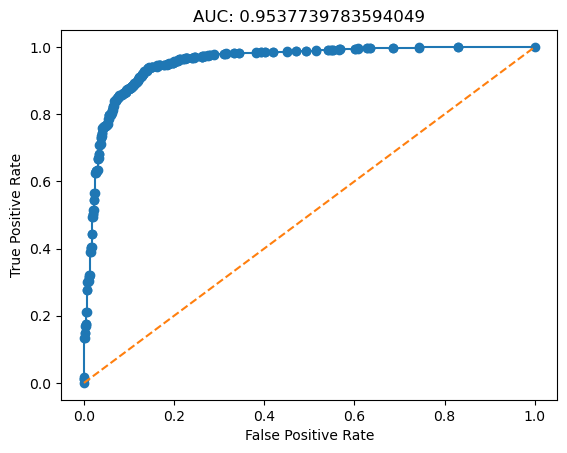

In [17]:
svd_1000_gender = test_logreg_target(X_svd_1000, users['gender'], 'svd_1000_gender')

In [18]:
svd_1000_results = test_linreg_targets(X_svd_1000, users, 'svd_1000_results')

In [19]:
svd_1000_results = pd.concat([svd_1000_results, svd_1000_gender['gender']], axis=1)

In [20]:
svd_1000_results

,name,age,ope,con,ext,agr,neu,gender
0,svd_1000_results,0.65,0.43,0.24,0.32,0.25,0.29,0.96


### SVD <i>k</i> = 1500

In [21]:
svd_1500 = TruncatedSVD(n_components=1500, random_state=42)

In [22]:
svd_1500.fit(df)

TruncatedSVD(n_components=1500, random_state=42)

In [23]:
svd_1500.explained_variance_ratio_.sum()

0.6724687050518281

In [24]:
X_svd_1500 = svd_1500.transform(df)

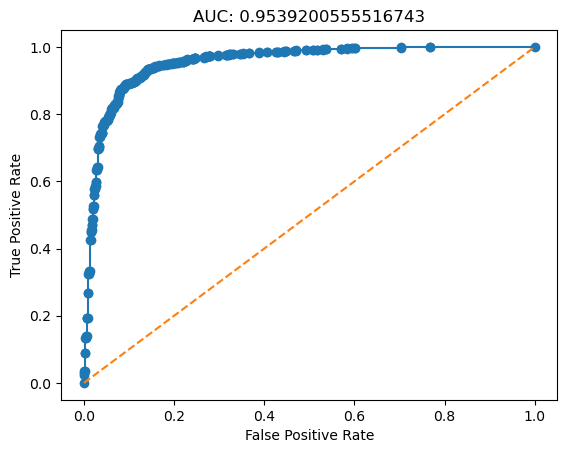

In [25]:
svd_1500_gender = test_logreg_target(X_svd_1500, users['gender'], 'svd_1500_gender')

In [26]:
svd_1500_results = test_linreg_targets(X_svd_1500, users, 'svd_1500_results')

In [27]:
svd_1500_results = pd.concat([svd_1500_results, svd_1500_gender['gender']], axis=1)

In [28]:
svd_1500_results

,name,age,ope,con,ext,agr,neu,gender
0,svd_1500_results,0.65,0.41,0.22,0.3,0.25,0.28,0.96


### LDA <i>k</i> = 100

In [29]:
lda_100 = LatentDirichletAllocation(n_components=100, random_state=42)

In [30]:
lda_100.fit(df)  # takes 4min:30s on my home PC

LatentDirichletAllocation(n_components=100, random_state=42)

In [31]:
X_lda_100 = lda_100.transform(df)

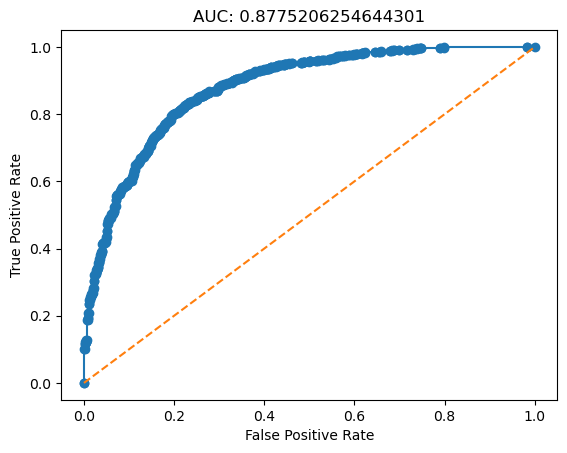

In [32]:
lda_100_gender = test_logreg_target(X_lda_100, users['gender'], 'lda_100_gender')

In [33]:
lda_100_results = test_linreg_targets(X_lda_100, users, 'lda_100_results')

In [34]:
lda_100_results = pd.concat([lda_100_results, lda_100_gender['gender']], axis=1)

In [35]:
lda_100_results

,name,age,ope,con,ext,agr,neu,gender
0,lda_100_results,0.68,0.38,0.24,0.23,0.17,0.23,0.88


### LDA <i>k</i> = 150

In [36]:
lda_150 = LatentDirichletAllocation(n_components=150, random_state=42)

In [37]:
lda_150.fit(df)  # takes 6min:00s on my home PC

LatentDirichletAllocation(n_components=150, random_state=42)

In [38]:
X_lda_150 = lda_150.transform(df)

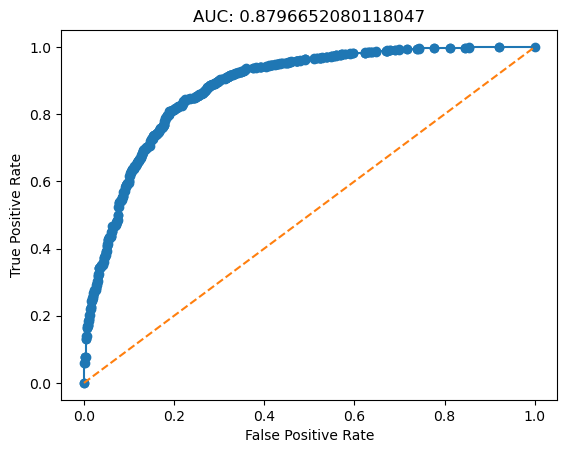

In [39]:
lda_150_gender = test_logreg_target(X_lda_150, users['gender'], 'lda_150_gender')

In [40]:
lda_150_results = test_linreg_targets(X_lda_150, users, 'lda_150_results')

In [41]:
lda_150_results = pd.concat([lda_150_results, lda_150_gender['gender']], axis=1)

In [42]:
lda_150_results

,name,age,ope,con,ext,agr,neu,gender
0,lda_150_results,0.71,0.38,0.23,0.24,0.18,0.23,0.88


### Results

In [43]:
different_k_results = pd.DataFrame()
different_k_results = different_k_results.append([svd_300_results, svd_1000_results,
                                                  svd_1500_results, lda_100_results,
                                                  lda_150_results], ignore_index=True)

C:\Users\lubec\AppData\Local\Temp\ipykernel_11152\1558822182.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  different_k_results = different_k_results.append([svd_300_results, svd_1000_results,


In [44]:
different_k_results.to_csv('results/different_k_results.csv')